In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
%matplotlib inline

In [2]:
threshold_country = 0.5 # zero if below this threshold
threshold_country_mul_refugee = 0.8 # zero if below this threshold

In [3]:
country_names = pd.read_csv('../Data/RefugeeCountries.csv', header=None, names=['Country'])
country_adjacency = pd.read_csv('../Data/CountryAdjacencyNew.csv', header=None, names=country_names.Country)
country_adjacency.set_index(country_names.Country, inplace=True)
country_adjacency.mask(country_adjacency < threshold_country, 0, inplace=True)
country_adjacency.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0
Albania,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0
Algeria,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.00000,0.0,0.773347,0.721049,0.0,0.0
Andorra,0.0,0.0,0.0,1.000000,0.821409,0.0,0.0,0.819222,0.0,0.0,...,0.0,0.84617,0.0,0.549582,0.84617,0.0,0.000000,0.000000,0.0,0.0
Angola,0.0,0.0,0.0,0.821409,1.000000,0.0,0.0,0.779352,0.0,0.0,...,0.0,0.80600,0.0,0.000000,0.80600,0.0,0.000000,0.000000,0.0,0.0


In [4]:
country_adjacency_without_names = pd.read_csv('../Data/CountryAdjacencyNew.csv', header=None)

In [5]:
# dataframe with all zeros
refugeeAdjacency = pd.DataFrame(0, index=country_names.Country, columns=country_names.Country)
refugeeAdjacency.shape

(214, 214)

Increase in refugees between consecutive years:

In [6]:
increase_refugee_data_folder = '../Data/IncreaseRefugeeMatrices/'
years = range(1976,2017)

for i in years:
    increaseYearMatrix = pd.read_csv(increase_refugee_data_folder + 'IncreaseRefugeeAdjacency'+str(i)+'.csv', 
                           header=None, names=country_names.Country, dtype=int)
    increaseYearMatrix.set_index(country_names.Country, inplace=True)
    
    refugeeAdjacency = refugeeAdjacency.add(increaseYearMatrix)

refugeeAdjacency = refugeeAdjacency.div(refugeeAdjacency.sum(axis=0), axis=1)
refugeeAdjacency.fillna(0, inplace=True)

In [7]:
merged = refugeeAdjacency.multiply(country_adjacency)
merged.mask(merged < threshold_country_mul_refugee, 0, inplace=True)

#merged = refugeeAdjacency
merged.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
G = nx.from_pandas_adjacency(merged.T, create_using=nx.DiGraph())
nodes_to_remove = list(nx.isolates(G))
G.remove_nodes_from(nodes_to_remove)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 18
Number of edges: 13
Average in degree:   0.7222
Average out degree:   0.7222


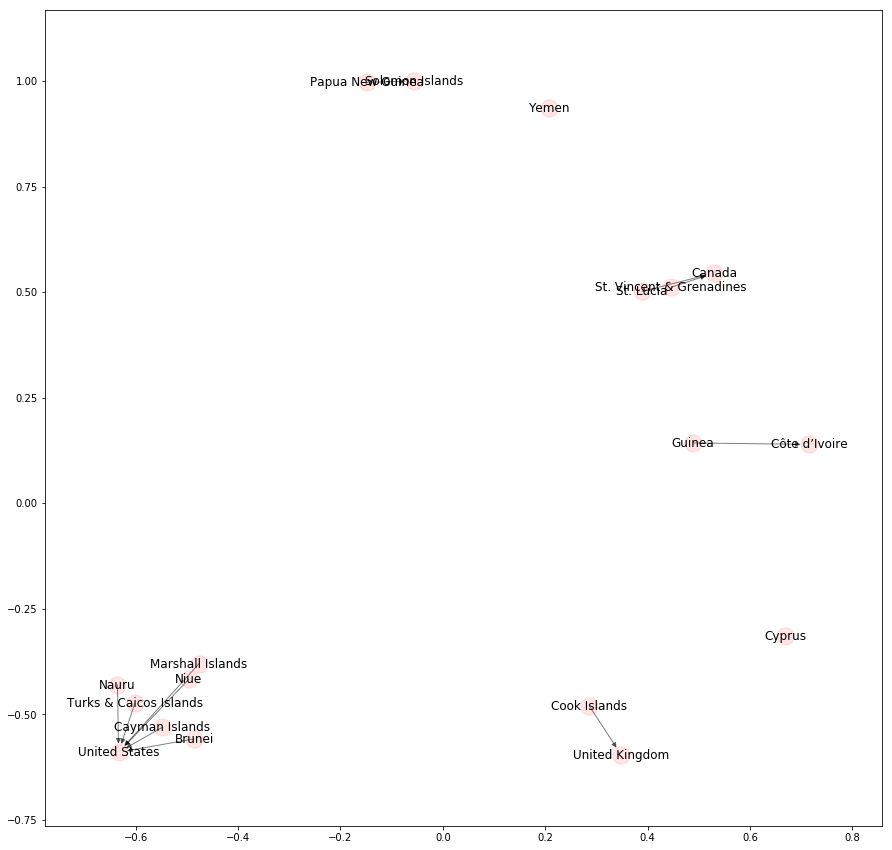

In [9]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0.1)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [10]:
outdeg = G.out_degree()
nodes_to_keep = [n for (n, deg) in outdeg if deg != 0]

merged = refugeeAdjacency.multiply(country_adjacency)
merged = pd.DataFrame(0, index=country_names.Country, columns=country_names.Country)[nodes_to_keep].add(merged)
merged.fillna(0, inplace=True)
merged.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00003,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [11]:
G = nx.from_pandas_adjacency(merged.T, create_using=nx.DiGraph())
nodes_to_remove = list(nx.isolates(G))
G.remove_nodes_from(nodes_to_remove)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 64
Number of edges: 83
Average in degree:   1.2969
Average out degree:   1.2969


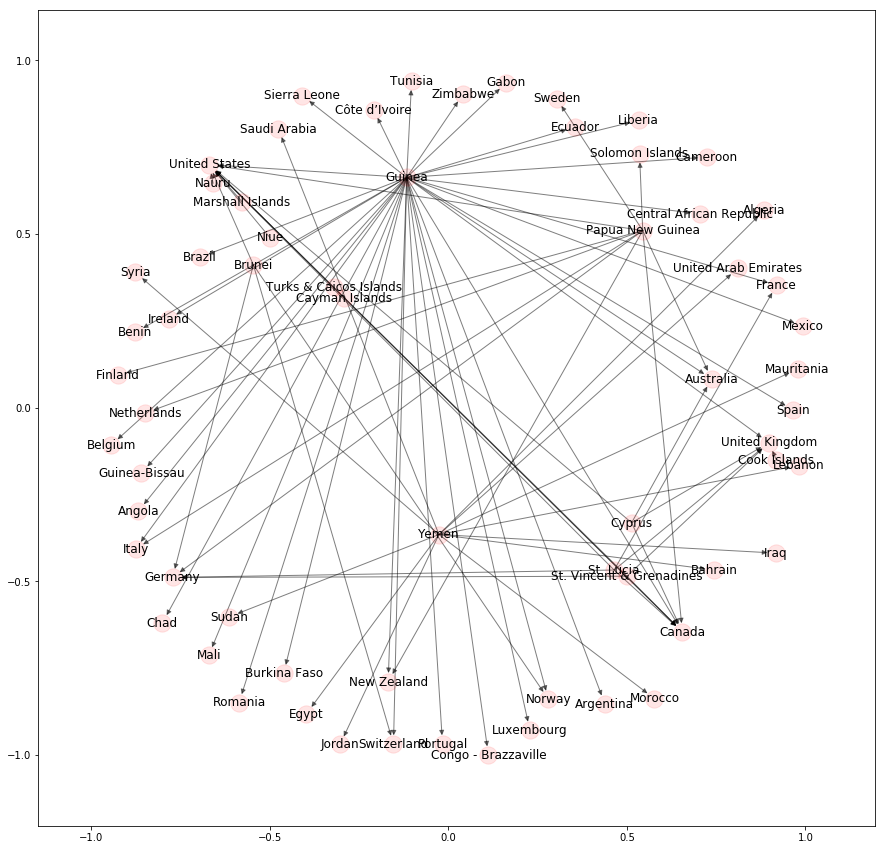

In [12]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, alpha=0.1)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [13]:
G2 = nx.from_pandas_adjacency(country_adjacency)
G2.remove_nodes_from(nodes_to_remove)
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 64
Number of edges: 1120
Average degree:  35.0000


In [14]:

parts = community.best_partition(G2)
values = [parts.get(node) for node in G2.nodes()]
print(values)

[0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2]


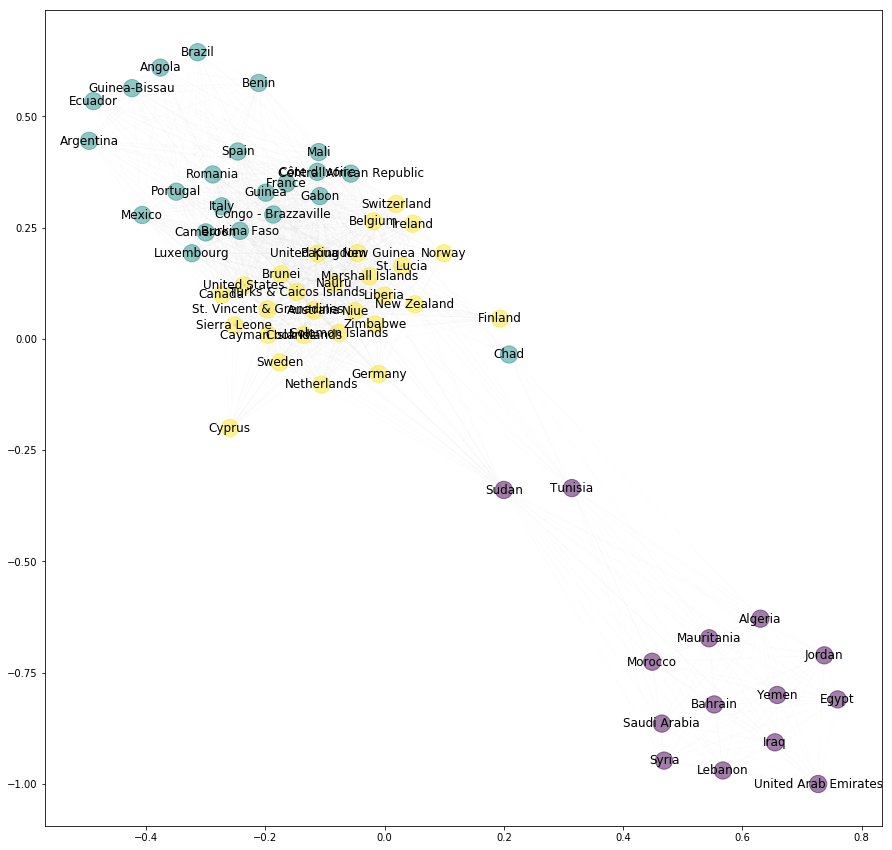

In [15]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos, node_color=values, alpha=0.5)
nx.draw_networkx_labels(G2, pos)
nx.draw_networkx_edges(G2, pos, alpha=0.01)
plt.show()

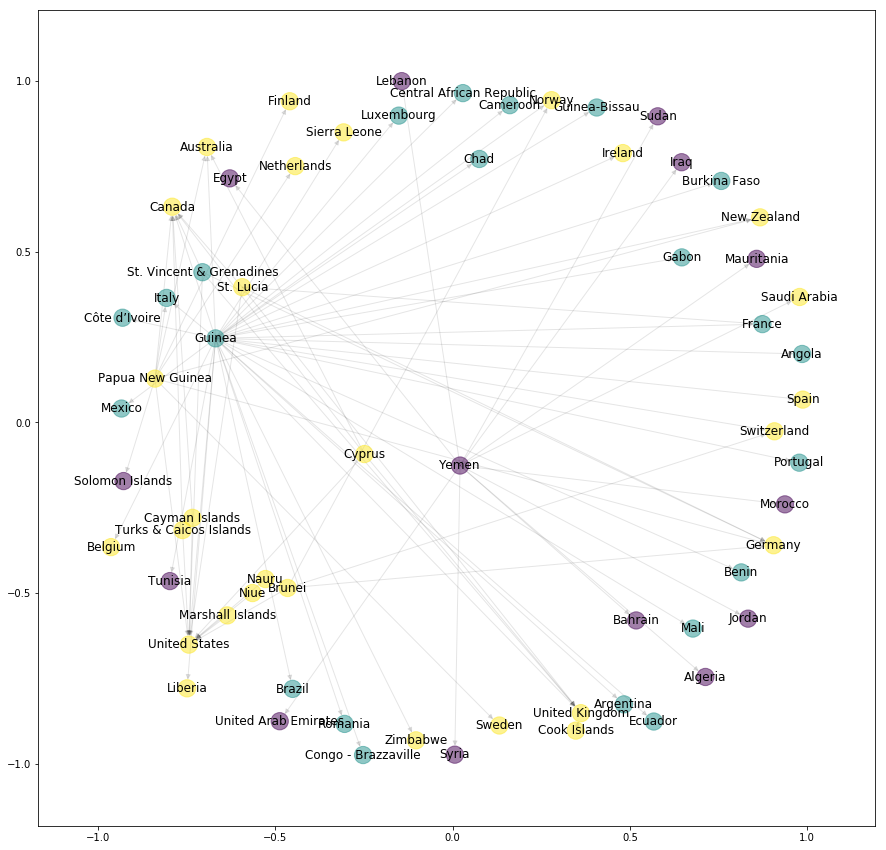

In [16]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=values, alpha=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show()